In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## 1. Central Tendency: mean ,median,mode

In [ ]:
# Use this when data is missing at random

In [4]:
cols_to_use = [
    "OverallQual",
    "TotalBsmtSF",
    "1stFlrSF",
    "GrLivArea",
    "WoodDeckSF",
    "BsmtUnfSF",
    "LotFrontage",
    "MasVnrArea",
    "GarageYrBlt",
    "SalePrice",
    "BsmtQual", 
    "FireplaceQu"
]

In [5]:
df=pd.read_csv("train (1).csv",usecols=cols_to_use)
df.head()

,LotFrontage,OverallQual,MasVnrArea,BsmtQual,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,FireplaceQu,GarageYrBlt,WoodDeckSF,SalePrice
0,65.0,7,196.0,Gd,150,856,856,1710,NaN,2003.0,0,208500
1,80.0,6,0.0,Gd,284,1262,1262,1262,TA,1976.0,298,181500
2,68.0,7,162.0,Gd,434,920,920,1786,TA,2001.0,0,223500
3,60.0,7,0.0,TA,540,756,961,1717,Gd,1998.0,0,140000
4,84.0,8,350.0,Gd,490,1145,1145,2198,TA,2000.0,192,250000


In [ ]:
#skew method in pandas can be used to check for skewness or to check is it normal. when normal value is 0

In [6]:
df["LotFrontage"].skew()

2.163569142324884

In [8]:
df["BsmtUnfSF"].skew()

0.9202684528039037

In [110]:
df1=df.copy()

In [12]:
df.shape

(1460, 12)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LotFrontage  1201 non-null   float64
 1   OverallQual  1460 non-null   int64  
 2   MasVnrArea   1452 non-null   float64
 3   BsmtQual     1423 non-null   object 
 4   BsmtUnfSF    1460 non-null   int64  
 5   TotalBsmtSF  1460 non-null   int64  
 6   1stFlrSF     1460 non-null   int64  
 7   GrLivArea    1460 non-null   int64  
 8   FireplaceQu  770 non-null    object 
 9   GarageYrBlt  1379 non-null   float64
 10  WoodDeckSF   1460 non-null   int64  
 11  SalePrice    1460 non-null   int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 137.0+ KB


In [14]:
df.isnull().mean()

LotFrontage    0.177397
OverallQual    0.000000
MasVnrArea     0.005479
BsmtQual       0.025342
BsmtUnfSF      0.000000
TotalBsmtSF    0.000000
1stFlrSF       0.000000
GrLivArea      0.000000
FireplaceQu    0.472603
GarageYrBlt    0.055479
WoodDeckSF     0.000000
SalePrice      0.000000
dtype: float64

In [16]:
x_train,x_test,y_train,y_test=train_test_split(df.drop("SalePrice",axis=1),df["SalePrice"],test_size=0.2)

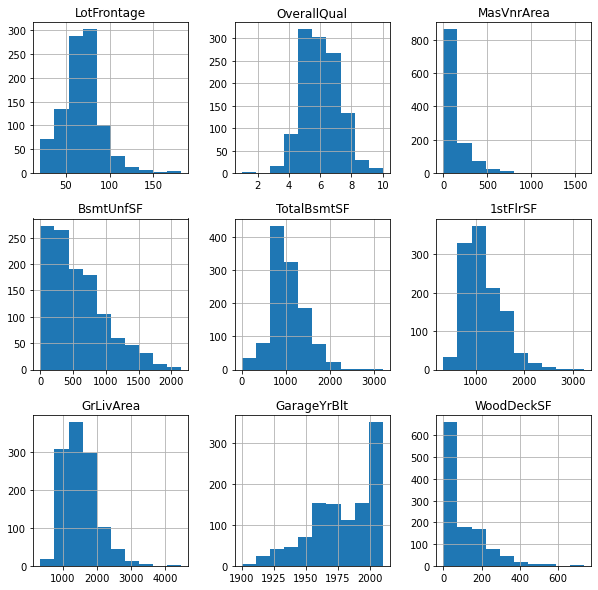

In [24]:
x_train.hist(bins=10,figsize=(10,10))
plt.show()

In [81]:
c=[i for i in df.columns if df[i].isnull().sum()>0 and df[i].dtypes==object]
n=[i for i in df.columns if df[i].isnull().sum()>0 and df[i].dtypes!=object]

In [82]:
c,n

(['BsmtQual', 'FireplaceQu'], ['LotFrontage', 'MasVnrArea', 'GarageYrBlt'])

In [97]:
d_n={i:x_train[i].median() for i in n}
d_c={i:x_train[i].mode()[0] for i in c}

In [101]:
d=d_n|d_c
d

{'LotFrontage': 68.0,
 'MasVnrArea': 0.0,
 'GarageYrBlt': 1980.0,
 'BsmtQual': 'TA',
 'FireplaceQu': 'Gd'}

In [103]:
x_train.fillna(d,inplace=True)
x_test.fillna(d,inplace=True)

In [105]:
x_train.isnull().sum(),x_test.isnull().sum()

(LotFrontage    0
 OverallQual    0
 MasVnrArea     0
 BsmtQual       0
 BsmtUnfSF      0
 TotalBsmtSF    0
 1stFlrSF       0
 GrLivArea      0
 FireplaceQu    0
 GarageYrBlt    0
 WoodDeckSF     0
 dtype: int64,
 LotFrontage    0
 OverallQual    0
 MasVnrArea     0
 BsmtQual       0
 BsmtUnfSF      0
 TotalBsmtSF    0
 1stFlrSF       0
 GrLivArea      0
 FireplaceQu    0
 GarageYrBlt    0
 WoodDeckSF     0
 dtype: int64)

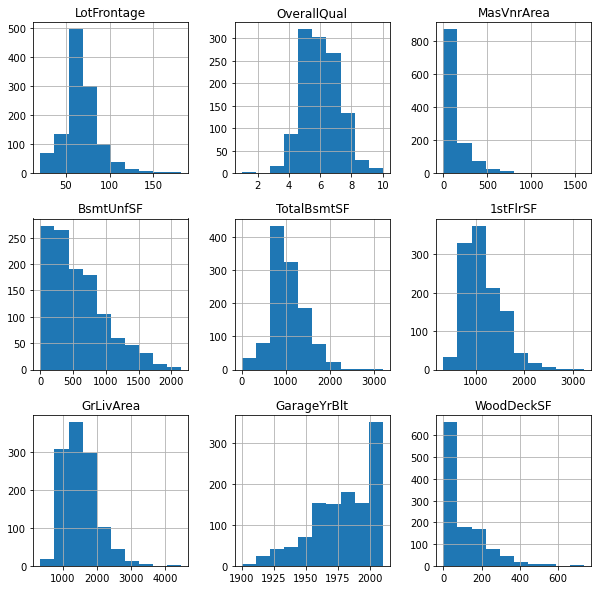

In [107]:
x_train.hist(bins=10,figsize=(10,10))
plt.show()

## 2. Arbitary values

In [ ]:
#replacing with values that are different from the data, so that it acts as a flag for missing value also.
#used when data is missing not at random
#changes the distribution

In [111]:
df1.head()

,LotFrontage,OverallQual,MasVnrArea,BsmtQual,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,FireplaceQu,GarageYrBlt,WoodDeckSF,SalePrice
0,65.0,7,196.0,Gd,150,856,856,1710,NaN,2003.0,0,208500
1,80.0,6,0.0,Gd,284,1262,1262,1262,TA,1976.0,298,181500
2,68.0,7,162.0,Gd,434,920,920,1786,TA,2001.0,0,223500
3,60.0,7,0.0,TA,540,756,961,1717,Gd,1998.0,0,140000
4,84.0,8,350.0,Gd,490,1145,1145,2198,TA,2000.0,192,250000


In [130]:
df1.isnull().sum()

LotFrontage    259
OverallQual      0
MasVnrArea       8
BsmtQual        37
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
GrLivArea        0
FireplaceQu    690
GarageYrBlt     81
WoodDeckSF       0
SalePrice        0
dtype: int64

In [119]:
x_train,x_test,y_train,y_test=train_test_split(df.drop("SalePrice",axis=1),df["SalePrice"],test_size=0.2)

In [128]:
n=['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [129]:
x_train[n].agg(["min","max"])

,LotFrontage,MasVnrArea,GarageYrBlt
min,21.0,0.0,1906.0
max,313.0,1600.0,2010.0


In [131]:
d={"LotFrontage":999,"MasVnrArea":1999,"GarageYrBlt":2999,"BsmtQual":"missing","FireplaceQu":"missing"}

In [132]:
x_train.fillna(d,inplace=True)
x_test.fillna(d,inplace=True)

In [134]:
x_train.isnull().sum(),x_test.isnull().sum()

(LotFrontage    0
 OverallQual    0
 MasVnrArea     0
 BsmtQual       0
 BsmtUnfSF      0
 TotalBsmtSF    0
 1stFlrSF       0
 GrLivArea      0
 FireplaceQu    0
 GarageYrBlt    0
 WoodDeckSF     0
 dtype: int64,
 LotFrontage    0
 OverallQual    0
 MasVnrArea     0
 BsmtQual       0
 BsmtUnfSF      0
 TotalBsmtSF    0
 1stFlrSF       0
 GrLivArea      0
 FireplaceQu    0
 GarageYrBlt    0
 WoodDeckSF     0
 dtype: int64)

### 3. Comeplete case analysis

In [145]:
#dropping rows with null values
#used when data is completely missing at random
#model in production will not how to handle if missing data comes, so that is disadvantage.for that u need to impute only.dropping will only work in traning
df1.head()

,LotFrontage,OverallQual,MasVnrArea,BsmtQual,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,FireplaceQu,GarageYrBlt,WoodDeckSF,SalePrice
0,65.0,7,196.0,Gd,150,856,856,1710,NaN,2003.0,0,208500
1,80.0,6,0.0,Gd,284,1262,1262,1262,TA,1976.0,298,181500
2,68.0,7,162.0,Gd,434,920,920,1786,TA,2001.0,0,223500
3,60.0,7,0.0,TA,540,756,961,1717,Gd,1998.0,0,140000
4,84.0,8,350.0,Gd,490,1145,1145,2198,TA,2000.0,192,250000


In [146]:
df1.isnull().sum()

LotFrontage    259
OverallQual      0
MasVnrArea       8
BsmtQual        37
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
GrLivArea        0
FireplaceQu    690
GarageYrBlt     81
WoodDeckSF       0
SalePrice        0
dtype: int64

In [147]:
df1.dropna()

,LotFrontage,OverallQual,MasVnrArea,BsmtQual,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,FireplaceQu,GarageYrBlt,WoodDeckSF,SalePrice
1,80.0,6,0.0,Gd,284,1262,1262,1262,TA,1976.0,298,181500
2,68.0,7,162.0,Gd,434,920,920,1786,TA,2001.0,0,223500
3,60.0,7,0.0,TA,540,756,961,1717,Gd,1998.0,0,140000
4,84.0,8,350.0,Gd,490,1145,1145,2198,TA,2000.0,192,250000
6,75.0,8,186.0,Ex,317,1686,1694,1694,Gd,2004.0,255,307000
...,...,...,...,...,...,...,...,...,...,...,...,...
1447,80.0,8,438.0,Gd,141,1220,1220,2090,TA,1995.0,0,240000
1451,78.0,8,194.0,Gd,1573,1573,1578,1578,Gd,2008.0,0,287090
1455,62.0,6,0.0,Gd,953,953,953,1647,TA,1999.0,0,175000
1456,85.0,6,119.0,Gd,589,1542,2073,2073,TA,1978.0,349,210000


## 4. End of tail imputation

In [ ]:
#only suitable for numerical variables
#if normally distributed,impute with mean+3*sd  (+ or - also)
#else impute with lower/upper fence
#assumption is data is not missing at random
#not used widely but used in financial data to highlight the missing data 
#it changes the distribution of data
#not suitable for linear based methods , for tree based suits well.

In [149]:
df1.head()

,LotFrontage,OverallQual,MasVnrArea,BsmtQual,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,FireplaceQu,GarageYrBlt,WoodDeckSF,SalePrice
0,65.0,7,196.0,Gd,150,856,856,1710,NaN,2003.0,0,208500
1,80.0,6,0.0,Gd,284,1262,1262,1262,TA,1976.0,298,181500
2,68.0,7,162.0,Gd,434,920,920,1786,TA,2001.0,0,223500
3,60.0,7,0.0,TA,540,756,961,1717,Gd,1998.0,0,140000
4,84.0,8,350.0,Gd,490,1145,1145,2198,TA,2000.0,192,250000


In [150]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LotFrontage  1201 non-null   float64
 1   OverallQual  1460 non-null   int64  
 2   MasVnrArea   1452 non-null   float64
 3   BsmtQual     1423 non-null   object 
 4   BsmtUnfSF    1460 non-null   int64  
 5   TotalBsmtSF  1460 non-null   int64  
 6   1stFlrSF     1460 non-null   int64  
 7   GrLivArea    1460 non-null   int64  
 8   FireplaceQu  770 non-null    object 
 9   GarageYrBlt  1379 non-null   float64
 10  WoodDeckSF   1460 non-null   int64  
 11  SalePrice    1460 non-null   int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 137.0+ KB


In [180]:
x_train,x_test,y_train,y_test=train_test_split(df1.drop("SalePrice",axis=1),df1["SalePrice"],test_size=0.2)

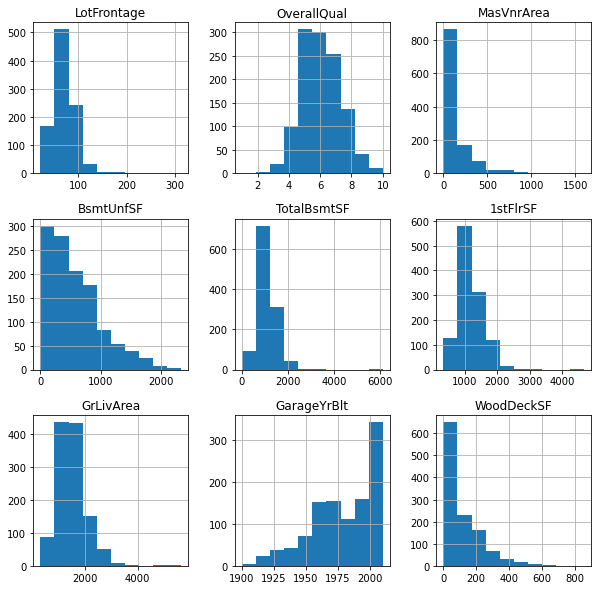

In [156]:
x_train.hist(figsize=(10,10))
plt.show()

In [153]:
#if LotFrontage was normally distributed , then do this . here it is not so lets do replace with fence as seen in next cell
x_train["LotFrontage"].mean()+(3*x_train["LotFrontage"].std())

139.66471687319444

In [159]:
iqr=x_train["LotFrontage"].quantile(0.75)-x_train["LotFrontage"].quantile(0.25)
iqr

21.0

In [160]:
uf=x_train["LotFrontage"].quantile(0.75)+1.5*iqr
uf

111.5

In [181]:
#just for visualization
x_train["LotFrontage_before"]=x_train["LotFrontage"].copy()

In [186]:
x_train["LotFrontage"].fillna(uf,inplace=True)

In [183]:
x_test["LotFrontage"].fillna(uf,inplace=True)

In [184]:
#do same for remaining numerical variables

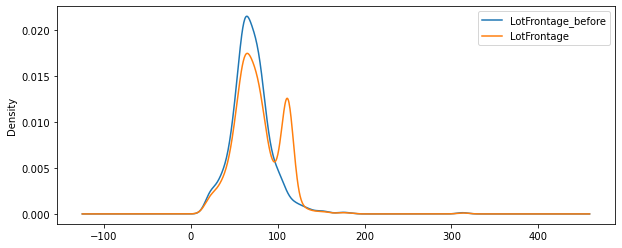

In [187]:
#training data before and after imputation for LotFrontage variable
plt.figure(figsize=(10,4))
x_train["LotFrontage_before"].plot(kind='kde')
x_train["LotFrontage"].plot(kind='kde')
plt.legend()

## 5. Random Sample Imputation

In [188]:
#assumption is data is missing at random
#it preserves the variance
#memory heavy for deployment since training data needs to be stored

In [257]:
df1.head()

,LotFrontage,OverallQual,MasVnrArea,BsmtQual,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,FireplaceQu,GarageYrBlt,WoodDeckSF,SalePrice
0,65.0,7,196.0,Gd,150,856,856,1710,NaN,2003.0,0,208500
1,80.0,6,0.0,Gd,284,1262,1262,1262,TA,1976.0,298,181500
2,68.0,7,162.0,Gd,434,920,920,1786,TA,2001.0,0,223500
3,60.0,7,0.0,TA,540,756,961,1717,Gd,1998.0,0,140000
4,84.0,8,350.0,Gd,490,1145,1145,2198,TA,2000.0,192,250000


In [271]:
x_train,x_test,y_train,y_test=train_test_split(df1.drop("SalePrice",axis=1),df1["SalePrice"],test_size=0.2)

In [272]:
x_train_before=x_train.copy()

In [259]:
x_train.isnull().sum()

LotFrontage    207
OverallQual      0
MasVnrArea       6
BsmtQual        33
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
GrLivArea        0
FireplaceQu    541
GarageYrBlt     67
WoodDeckSF       0
dtype: int64

In [273]:
#select columns which has null values
c=[i for i in df.columns if df[i].isnull().sum()>0]
c

['LotFrontage', 'MasVnrArea', 'BsmtQual', 'FireplaceQu', 'GarageYrBlt']

In [274]:
for i in c:
    n=x_train[i].isnull().sum()  #number of null in that column n
    n2=x_test[i].isnull().sum()  #for test data
    
    s1=x_train[i].dropna().sample(n,random_state=1)   #take  n samples from train data for train data
    s2=x_train[i].dropna().sample(n2,random_state=1)   #take n2 samples from train data for imputing test data
    
    s1.index=x_train[x_train[i].isnull()].index    #change the index of the samples to index of the missing data
    s2.index=x_test[x_test[i].isnull()].index
    
    x_train.loc[x_train[i].isnull(),i]=s1     #replace
    x_test.loc[x_test[i].isnull(),i]=s2

In [275]:
x_train.isnull().sum(),x_test.isnull().sum()

(LotFrontage    0
 OverallQual    0
 MasVnrArea     0
 BsmtQual       0
 BsmtUnfSF      0
 TotalBsmtSF    0
 1stFlrSF       0
 GrLivArea      0
 FireplaceQu    0
 GarageYrBlt    0
 WoodDeckSF     0
 dtype: int64,
 LotFrontage    0
 OverallQual    0
 MasVnrArea     0
 BsmtQual       0
 BsmtUnfSF      0
 TotalBsmtSF    0
 1stFlrSF       0
 GrLivArea      0
 FireplaceQu    0
 GarageYrBlt    0
 WoodDeckSF     0
 dtype: int64)

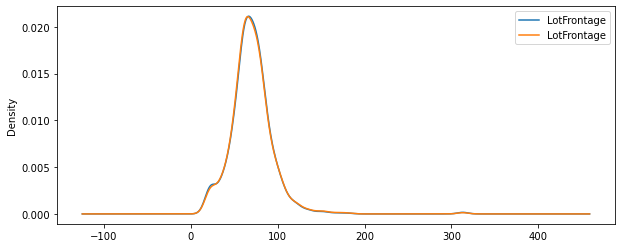

In [283]:
#here both have same distribution
plt.figure(figsize=(10,4))
x_train["LotFrontage"].plot(kind="kde")
x_train_before["LotFrontage"].plot(kind="kde")
plt.legend()

## 6. Mean/Median by group

In [345]:
#only for numericals

In [346]:
cols_to_use = [
    "LotShape",
    "OverallQual",
    "TotalBsmtSF",
    "LotFrontage",
    "MasVnrArea",
    "GarageYrBlt",
    "SalePrice",
]

In [347]:
df=pd.read_csv("train (1).csv",usecols=cols_to_use)
df.head()

,LotFrontage,LotShape,OverallQual,MasVnrArea,TotalBsmtSF,GarageYrBlt,SalePrice
0,65.0,Reg,7,196.0,856,2003.0,208500
1,80.0,Reg,6,0.0,1262,1976.0,181500
2,68.0,IR1,7,162.0,920,2001.0,223500
3,60.0,IR1,7,0.0,756,1998.0,140000
4,84.0,IR1,8,350.0,1145,2000.0,250000


In [348]:
x_train,x_test,y_train,y_test=train_test_split(df.drop("SalePrice",axis=1),df["SalePrice"],test_size=0.2,random_state=1)

In [349]:
df.isnull().sum()

LotFrontage    259
LotShape         0
OverallQual      0
MasVnrArea       8
TotalBsmtSF      0
GarageYrBlt     81
SalePrice        0
dtype: int64

In [350]:
l=["LotFrontage","MasVnrArea","GarageYrBlt"]

In [351]:
g=df["LotShape"].unique()
g

array(['Reg', 'IR1', 'IR2', 'IR3'], dtype=object)

In [352]:
d={}
for i in g:
    d[i]=x_train[x_train["LotShape"]==i][l].mean().to_dict()

In [353]:
d

{'Reg': {'LotFrontage': 67.32934131736526,
  'MasVnrArea': 87.86407766990291,
  'GarageYrBlt': 1974.8067846607669},
 'IR1': {'LotFrontage': 74.69581749049429,
  'MasVnrArea': 132.2110552763819,
  'GarageYrBlt': 1984.3118556701031},
 'IR2': {'LotFrontage': 79.91304347826087,
  'MasVnrArea': 147.88571428571427,
  'GarageYrBlt': 1989.142857142857},
 'IR3': {'LotFrontage': 174.6,
  'MasVnrArea': 132.66666666666666,
  'GarageYrBlt': 1997.6666666666667}}

In [358]:
for i in d.keys():
    x_train[x_train["LotShape"]==i] = x_train[x_train["LotShape"]==i].fillna(d[i])
    x_test[x_test["LotShape"]==i] = x_test[x_test["LotShape"]==i].fillna(d[i])

In [359]:
x_train.isnull().sum()

LotFrontage    0
LotShape       0
OverallQual    0
MasVnrArea     0
TotalBsmtSF    0
GarageYrBlt    0
dtype: int64

## 7. KNN Imputation

In [453]:
#this is a multivariate method
#this works only for numerical variable since it takes average. if we label encode categorical and then pass if it takes average of n neighbours that doesnt make any sense

In [454]:
df=pd.read_csv("train (1).csv",usecols=cols_to_use)
df.head()

,LotFrontage,LotShape,OverallQual,MasVnrArea,TotalBsmtSF,GarageYrBlt,SalePrice
0,65.0,Reg,7,196.0,856,2003.0,208500
1,80.0,Reg,6,0.0,1262,1976.0,181500
2,68.0,IR1,7,162.0,920,2001.0,223500
3,60.0,IR1,7,0.0,756,1998.0,140000
4,84.0,IR1,8,350.0,1145,2000.0,250000


In [455]:
from sklearn.impute import KNNImputer

In [456]:
x_train,x_test,y_train,y_test=train_test_split(df.drop("SalePrice",axis=1),df["SalePrice"],test_size=0.2)

In [457]:
x_train.isnull().sum()

LotFrontage    199
LotShape         0
OverallQual      0
MasVnrArea       8
TotalBsmtSF      0
GarageYrBlt     63
dtype: int64

In [458]:
imputer=KNNImputer()

In [459]:
x1=x_train.select_dtypes(exclude="object")
x2=x_test.select_dtypes(exclude="object")

In [460]:
x1=pd.DataFrame(imputer.fit_transform(x1),columns=x1.columns)
x2=pd.DataFrame(imputer.transform(x2),columns=x2.columns)

In [461]:
x_train=x_train.reset_index()
x_test=x_test.reset_index()

In [462]:
x_train=pd.concat([x1,x_train["LotShape"]],axis=1)
x_test=pd.concat([x2,x_test["LotShape"]],axis=1)

In [463]:
x_train.isnull().sum()

LotFrontage    0
OverallQual    0
MasVnrArea     0
TotalBsmtSF    0
GarageYrBlt    0
LotShape       0
dtype: int64

## 8. MICE

In [464]:
#assumption is data is missing at random

In [468]:
from sklearn.experimental import enable_iterative_imputer

In [469]:
from sklearn.impute import IterativeImputer

In [500]:
from sklearn.linear_model import LinearRegression,LogisticRegression

In [519]:
from sklearn.preprocessing import OrdinalEncoder

In [475]:
cols_to_use = [
    "GrLivArea",
    "BsmtUnfSF",
    "LotFrontage",
    "GarageYrBlt",
    "SalePrice",
    "BsmtQual", 
    "FireplaceQu"
]

In [476]:
df=pd.read_csv("train (1).csv",usecols=cols_to_use)
df.head()

,LotFrontage,BsmtQual,BsmtUnfSF,GrLivArea,FireplaceQu,GarageYrBlt,SalePrice
0,65.0,Gd,150,1710,NaN,2003.0,208500
1,80.0,Gd,284,1262,TA,1976.0,181500
2,68.0,Gd,434,1786,TA,2001.0,223500
3,60.0,TA,540,1717,Gd,1998.0,140000
4,84.0,Gd,490,2198,TA,2000.0,250000


In [480]:
x_train,x_test,y_train,y_test=train_test_split(df.drop("SalePrice",axis=1),df["SalePrice"],test_size=0.2,random_state=1)

In [482]:
x_train.isnull().sum()

LotFrontage    209
BsmtQual        30
BsmtUnfSF        0
GrLivArea        0
FireplaceQu    548
GarageYrBlt     61
dtype: int64

In [ ]:
#for numerical data:

In [485]:
imputer=IterativeImputer(estimator=LinearRegression(),initial_strategy="mean",max_iter=10,random_state=10)

In [492]:
n=x_train.select_dtypes(exclude="object")

In [493]:
x_train1=pd.DataFrame(imputer.fit_transform(n),columns=n.columns)

In [498]:
x_train1.iloc[131]

LotFrontage      60.0
BsmtUnfSF       697.0
GrLivArea       864.0
GarageYrBlt    1957.0
Name: 131, dtype: float64

In [ ]:
#do same for test data but just transform

In [ ]:
#for categorical data:

In [520]:
m=x_train.select_dtypes(include="object")

In [515]:
imputer2=IterativeImputer(estimator=LogisticRegression(),initial_strategy="most_frequent",max_iter=10,random_state=10)

In [524]:
m=pd.DataFrame(OrdinalEncoder().fit_transform(m),columns=m.columns)

In [527]:
m.isnull().sum()

BsmtQual        30
FireplaceQu    548
dtype: int64

In [528]:
x_train2=pd.DataFrame(imputer2.fit_transform(m),columns=m.columns)

In [529]:
x_train2.isnull().sum()

BsmtQual       0
FireplaceQu    0
dtype: int64

## Imputation methods using central tendency and arbitary values discussed in 1 and 2 using Sklearn simple imputer 

In [531]:
#using sklearn for this nstead of pandas fillna is better approach because it better suits in ml pipeline

In [534]:
df=pd.read_csv("train (1).csv",usecols=cols_to_use)
df.head()

,LotFrontage,BsmtQual,BsmtUnfSF,GrLivArea,FireplaceQu,GarageYrBlt,SalePrice
0,65.0,Gd,150,1710,NaN,2003.0,208500
1,80.0,Gd,284,1262,TA,1976.0,181500
2,68.0,Gd,434,1786,TA,2001.0,223500
3,60.0,TA,540,1717,Gd,1998.0,140000
4,84.0,Gd,490,2198,TA,2000.0,250000


In [535]:
df.isnull().sum()

LotFrontage    259
BsmtQual        37
BsmtUnfSF        0
GrLivArea        0
FireplaceQu    690
GarageYrBlt     81
SalePrice        0
dtype: int64

In [532]:
from sklearn.impute import SimpleImputer

In [533]:
imputer=SimpleImputer(strategy="mean")

In [539]:
n=df.select_dtypes(exclude="object")

In [542]:
x_train,x_test,y_train,y_test=train_test_split(n,df["SalePrice"],test_size=0.2)

In [544]:
n=pd.DataFrame(imputer.fit_transform(x_train),columns=n.columns)

In [545]:
n.isnull().sum()

LotFrontage    0
BsmtUnfSF      0
GrLivArea      0
GarageYrBlt    0
SalePrice      0
dtype: int64

In [ ]:
#for test data just use transform

In [546]:
# for mode:apply strategy as most_frequent

In [ ]:
#for arbitary value:strategy=constant,fill_value=value . may be like 99,-1 etc and for categorical:"missing"

In [547]:
#if i  need to separately do different  strategy for different columns, its lengthy, so use column transformer

## Adding Missing indicator to sklearn imputers

In [549]:
cols_to_use = [
    "GrLivArea",
    "BsmtUnfSF",
    "LotFrontage",
    "GarageYrBlt",
    "SalePrice",
]

In [550]:
df=pd.read_csv("train (1).csv",usecols=cols_to_use)
df.head()

,LotFrontage,BsmtUnfSF,GrLivArea,GarageYrBlt,SalePrice
0,65.0,150,1710,2003.0,208500
1,80.0,284,1262,1976.0,181500
2,68.0,434,1786,2001.0,223500
3,60.0,540,1717,1998.0,140000
4,84.0,490,2198,2000.0,250000


In [551]:
df.isnull().sum()

LotFrontage    259
BsmtUnfSF        0
GrLivArea        0
GarageYrBlt     81
SalePrice        0
dtype: int64

In [565]:
x_train,x_test,y_train,y_test=train_test_split(df,df["SalePrice"],test_size=0.2)

In [583]:
imputer=SimpleImputer(strategy="median",add_indicator=True)

In [584]:
c=list(x_train.columns)+["LotFrontage_indicator","GarageYrBlt_indicator"]

In [585]:
x_train=pd.DataFrame(imputer.fit_transform(x_train),columns=c)

In [586]:
x_train

,LotFrontage,BsmtUnfSF,GrLivArea,GarageYrBlt,SalePrice,LotFrontage_indicator,GarageYrBlt_indicator
0,69.0,204.0,1060.0,1968.0,154000.0,1.0,0.0
1,71.0,864.0,864.0,1972.0,116050.0,0.0,0.0
2,75.0,1088.0,1959.0,2006.0,270000.0,0.0,0.0
3,70.0,380.0,1700.0,1959.0,165500.0,0.0,0.0
4,36.0,175.0,1112.0,1976.0,85000.0,0.0,0.0
...,...,...,...,...,...,...,...
1163,105.0,728.0,1456.0,2006.0,172785.0,0.0,0.0
1164,93.0,1141.0,2263.0,1998.0,258000.0,0.0,0.0
1165,110.0,626.0,1976.0,2006.0,440000.0,0.0,0.0
1166,50.0,901.0,901.0,1954.0,107900.0,0.0,0.0


In [587]:
x_test=pd.DataFrame(imputer.transform(x_test),columns=c)

In [588]:
x_test

,LotFrontage,BsmtUnfSF,GrLivArea,GarageYrBlt,SalePrice,LotFrontage_indicator,GarageYrBlt_indicator
0,75.0,1237.0,2775.0,1988.0,325000.0,0.0,0.0
1,70.0,121.0,925.0,1965.0,117500.0,0.0,0.0
2,112.0,1097.0,1097.0,1995.0,145000.0,0.0,0.0
3,80.0,485.0,1790.0,1972.0,165150.0,0.0,0.0
4,64.0,545.0,1476.0,2005.0,173500.0,0.0,0.0
...,...,...,...,...,...,...,...
287,69.0,718.0,1006.0,1980.0,80000.0,1.0,1.0
288,81.0,223.0,2127.0,1994.0,271000.0,0.0,0.0
289,70.0,1212.0,1212.0,2001.0,178000.0,0.0,0.0
290,57.0,203.0,773.0,1953.0,110000.0,0.0,0.0
